# 시계열 분석

## 6장. SES & Holt's & Holt-Winter's 모델
- 실제데이터와 예측데이터와 가중치를 전부 활용해서 예측
- trend와 seasonal을 잘 반영 못해준다는 단점을 극복해주기 위해 만듬
    - simple SES는 반영 못해줌
    - Holt's는 trend를 잘 반영한다.
    - Holt-Winter's는 trend와 seasonal 둘다 반영 잘 해줌

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

---
---

## 데이터 불러오기

In [3]:
airline = pd.read_csv('./data/airline_passengers.csv', index_col = 'Month', parse_dates=True)
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


---

## 01. SES(Simple Exponential Smoothing)

In [4]:
from statsmodels.tsa.api import SimpleExpSmoothing

In [5]:
# train, test data 분할
train = airline[:'1959']
test = airline['1960':]

<AxesSubplot:xlabel='Month'>

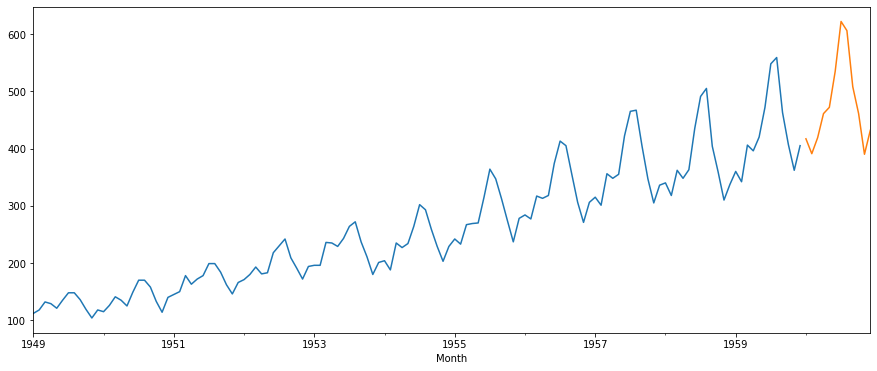

In [7]:
# 그래프로 train, test 확인
train['Thousands of Passengers'].plot(figsize=(15,6))
test['Thousands of Passengers'].plot(figsize=(15,6))

In [8]:
# ses model 만들기
# 주의: array로 바꾸어 주어야 한다.

ses_model = \
SimpleExpSmoothing(np.asarray(train['Thousands of Passengers']))

In [9]:
# 모델 fitting
ses_result = ses_model.fit()

In [10]:
# test 오염시키지 않도록 복사
y_hat = test.copy()

In [11]:
# test 데이터 길이만큼 예측
y_hat['SES'] = ses_result.forecast(len(test))

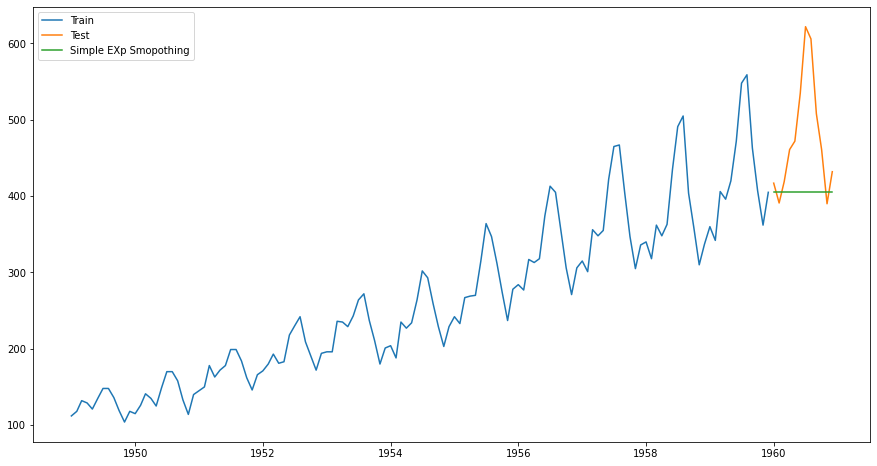

In [12]:
# 그래프로 확인 
plt.figure(figsize=(15,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['SES'], label='Simple EXp Smopothing')
plt.legend()

## 좋지않은 성능. 결과가 그정도 값일것이다 만큼만 예측해줌...

In [14]:
# 모델평가
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['SES']))

103.12445366139319

---

## 02. Holt's

In [16]:
from statsmodels.tsa.api import Holt

In [17]:
# array로 바꾸어주고 모델 만들기
holt_model = Holt(np.asarray(train['Thousands of Passengers']))

In [18]:
# 모델 fitting
holt_result = holt_model.fit()

In [19]:
# 예측
y_hat['HOLT'] = holt_result.forecast(len(test))

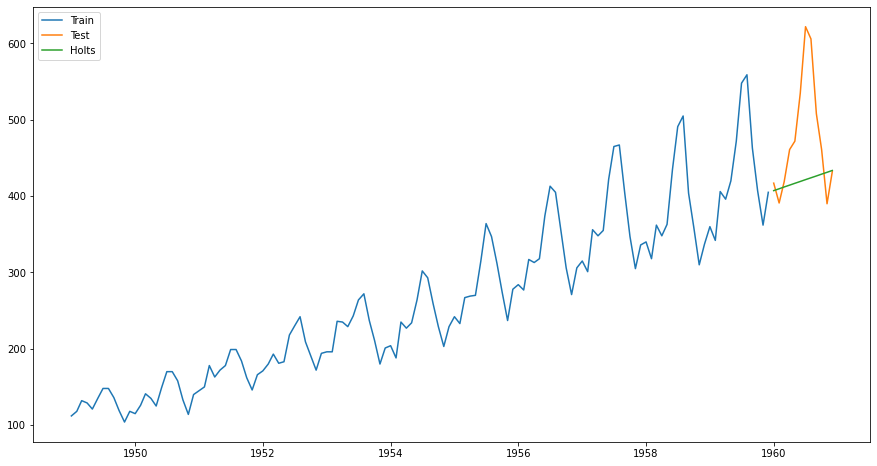

In [20]:
# 그래프로 확인
plt.figure(figsize=(15,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['HOLT'], label='Holts')
plt.legend()

## 트렌드는 약간 반영해주는 모습 보인다.(기울기)

In [21]:
# 모델평가(RMSE)
np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['HOLT']))

92.10399279260226

---

## 03. Holt-Winter's

In [22]:
from statsmodels.tsa.api import ExponentialSmoothing

In [24]:
# 모델 만들기 (계절성과 트렌드 지정해주는 것 확인가능,)
winter_model = \
ExponentialSmoothing(np.asarray(train['Thousands of Passengers']),
                    seasonal_periods=12, trend='add', seasonal='add')

In [25]:
# 모델 fitting
winter_result = winter_model.fit()

In [26]:
# 모델 예측
y_hat['WINTER'] = \
winter_result.forecast(len(test))

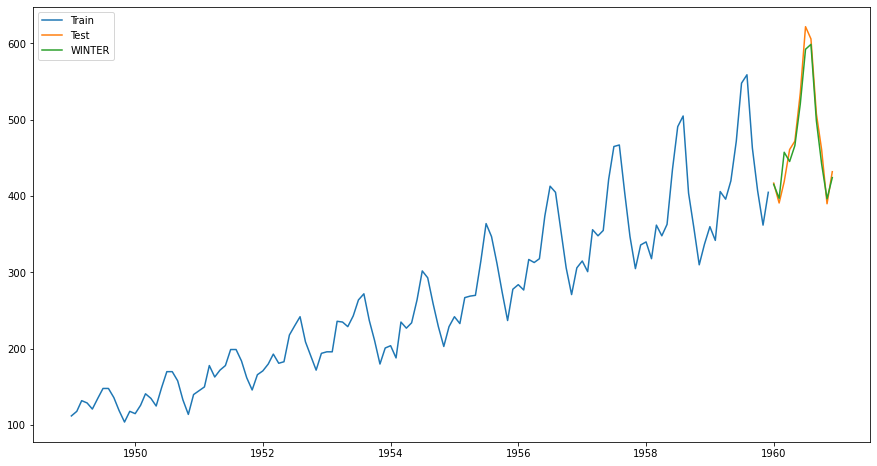

In [27]:
# 그래프로 확인
plt.figure(figsize=(15,8))
plt.plot(train['Thousands of Passengers'], label='Train')
plt.plot(test['Thousands of Passengers'], label='Test')
plt.plot(y_hat['WINTER'], label='WINTER')
plt.legend()

## 트렌드와 seasonality 도 반영한 거의 비슷한 예측이 된 것 확인 가능하다.

In [28]:
# 모델평가(RMSE)
np.sqrt(mean_squared_error(test['Thousands of Passengers'],y_hat['WINTER']))

16.98114161550258